In [1]:
from pytrends.request import TrendReq

# Create a pytrends object. Request data from google trends
# hl -> host language
pytrends = TrendReq(hl = 'en-US')

# Search terms or keywords I want to compare. Max 5 keywords at a time
keywords = ['Python', 'R', 'C++', 'Java', 'HTML']

# Search for the keywords and return the data
# Arguments -> our keywords, and the time frame (5 years to this date)
pytrends.build_payload(keywords, timeframe = 'today 5-y')

# Specify and get data
data = pytrends.interest_over_time()
data

Python   R  C++  Java  HTML  isPartial
date                                              
2019-06-16      25  46   69    23    12      False
2019-06-23      24  47   76    23    12      False
2019-06-30      23  44   73    22    12      False
2019-07-07      25  47   75    23    13      False
2019-07-14      24  50   77    24    12      False
...            ...  ..  ...   ...   ...        ...
2024-05-19      29  46   85    19    11      False
2024-05-26      28  45   83    19    11      False
2024-06-02      29  46   86    19    11      False
2024-06-09      29  45   84    19    11      False
2024-06-16      28  45   84    19    11       True

[262 rows x 6 columns]

In [2]:
type(data)

pandas.core.frame.DataFrame

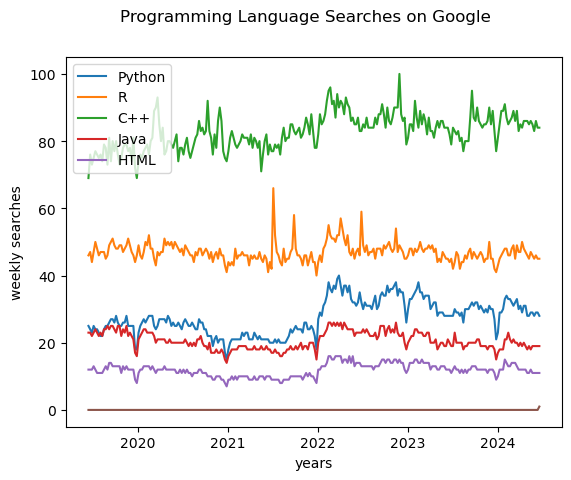

In [19]:
# Turn data into a graph (plot data)
import matplotlib.pyplot as plt
plt.plot(data)

# Add titles
plt.suptitle('Programming Language Searches on Google')
# Title for each axis
plt.xlabel('years')
plt.ylabel('weekly searches')
# Add legend (default is 'upper right'
plt.legend(keywords, loc = 'upper left')
# To show my graph -> plt.show()
# To save my graph
plt.savefig('Google Trends.png')

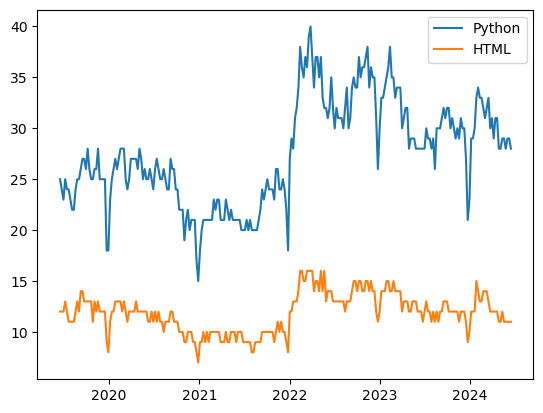

In [9]:
# Analyze data (compare one to another)
focus = ['Python', 'HTML']
# Graph our data in the list, or plot the data
plt.plot(data[focus])
# Add legend
plt.legend(focus)

In [12]:
# Extract data country-level about our keywords
data2 = pytrends.interest_by_region(resolution = 'COUNTRY', inc_low_vol = True)
# Which 10 countries have the most searches for pyhton
data2 = data2['Python'].nlargest(10)
data2

geoName
China                   50
Israel                  40
Svalbard & Jan Mayen    37
Eritrea                 33
St. Helena              33
Armenia                 29
Russia                  29
Singapore               28
South Korea             28
Kyrgyzstan              27
Name: Python, dtype: int32

In [13]:
type(data2)

pandas.core.series.Series

In [14]:
# Convert to DataFrame
data2 = data2.to_frame()
data2

Python
geoName                     
China                     50
Israel                    40
Svalbard & Jan Mayen      37
Eritrea                   33
St. Helena                33
Armenia                   29
Russia                    29
Singapore                 28
South Korea               28
Kyrgyzstan                27

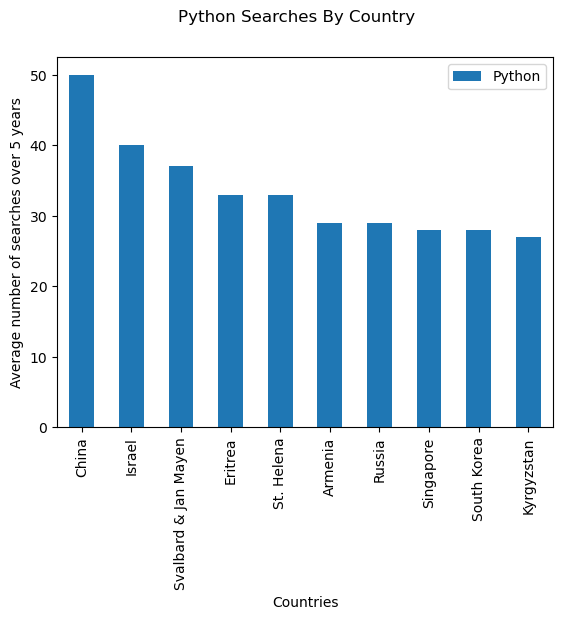

In [16]:
# Plot a bar chart with the data WITH PANDAS
data2.plot(kind = 'bar')

# Add titles
plt.suptitle('Python Searches By Country')
plt.xlabel('Countries')
plt.ylabel('Average number of searches over 5 years')
plt.show()

In [17]:
# Plot a bar chart with multiple keywords
data3 = pytrends.interest_by_region(resolution = 'COUNTRY', inc_low_vol = True)
# Extract certain members with slice notation
data3 = data3[55:60]
data3

Python   R  C++  Java  HTML
geoName                                   
Cuba               12  16   55    11     6
Curaçao             8  30   51     5     6
Cyprus             19  20   43     9     9
Czechia            17  21   44    10     8
Côte d’Ivoire       8  17   56    13     6

<Axes: xlabel='geoName'>

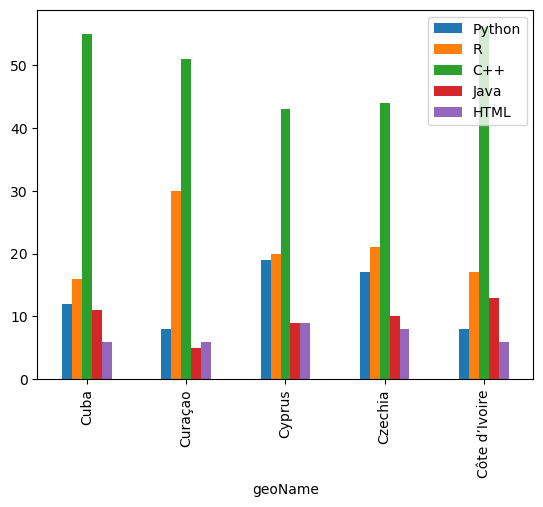

In [18]:
data3.plot(kind = 'bar')